In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/alvishaflorineveigas/battery-soh-dataset-csv/battery_soh_dataset.csv


In [3]:
import pandas as pd

data = pd.read_csv('/kaggle/input/datasets/alvishaflorineveigas/battery-soh-dataset-csv/battery_soh_dataset.csv')

print(data.head())

   cycle  voltage  current  temperature  time  capacity   soc    soh
0      1     4.20     1.50         25.0    10      2.00  0.95  1.000
1      2     4.18     1.48         25.5    12      1.99  0.94  0.995
2      3     4.16     1.47         26.0    14      1.98  0.93  0.990
3      4     4.14     1.45         26.5    16      1.96  0.92  0.980
4      5     4.12     1.44         27.0    18      1.94  0.91  0.970


In [5]:
X = data[['voltage','current','temperature','soc']]
y = data['soh']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.007812500000000056
R2 Score: 0.9863319131334014


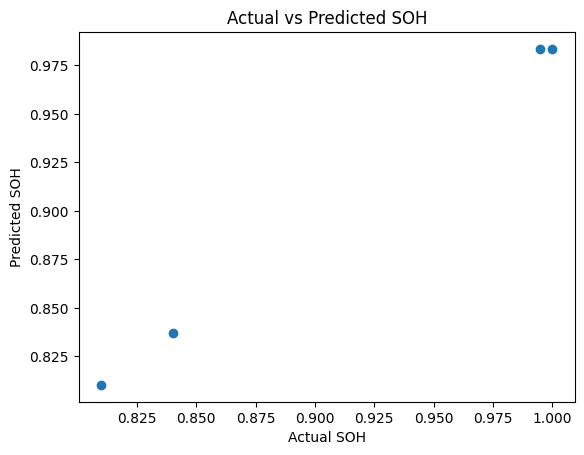

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual SOH")
plt.ylabel("Predicted SOH")
plt.title("Actual vs Predicted SOH")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
rf_pred = rf_model.predict(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
lr_pred = lr_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

print("🔹 Random Forest Results")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))

print("\n-------------------------\n")

print("🔹 Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))

🔹 Random Forest Results
MAE: 0.006375000000000353
R2 Score: 0.9914005377456034

-------------------------

🔹 Linear Regression Results
MAE: 0.004065631874847236
R2 Score: 0.9966545530869712


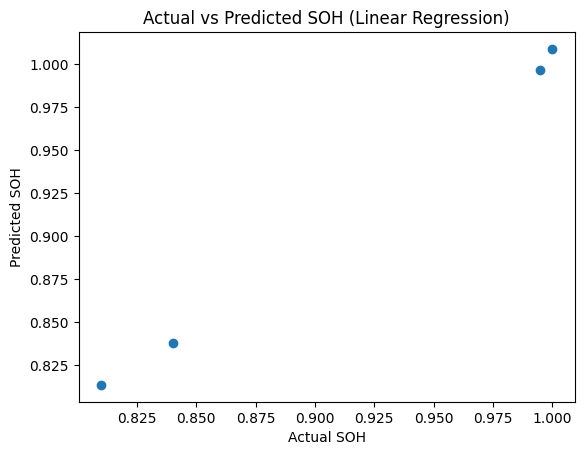

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lr_pred)
plt.xlabel("Actual SOH")
plt.ylabel("Predicted SOH")
plt.title("Actual vs Predicted SOH (Linear Regression)")
plt.show()